### Anomaly detection

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

#### Data source: https://www.kaggle.com/aturner374/eighty-years-of-canadian-climate-data

In [2]:
df = pd.read_csv('datasets/Canadian_climate_history.csv')

In [3]:
df.head()

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,01-Jan-1940 00:00:00,-11.4,0.5,NaN,NaN,NaN,NaN,-8.9,0.0,NaN,...,NaN,NaN,-8.9,0.0,8.9,5.8,NaN,NaN,-20.9,0.0
1,02-Jan-1940 00:00:00,-12.0,0.5,NaN,NaN,NaN,NaN,-14.5,0.0,NaN,...,NaN,NaN,-13.1,0.3,9.7,7.1,NaN,NaN,-18.4,0.0
2,03-Jan-1940 00:00:00,-12.0,1.0,NaN,NaN,NaN,NaN,-11.1,0.0,NaN,...,NaN,NaN,-6.1,0.0,7.8,1.0,NaN,NaN,-22.0,0.0
3,04-Jan-1940 00:00:00,-11.4,0.8,NaN,NaN,NaN,NaN,-11.1,0.3,NaN,...,NaN,NaN,-6.4,0.5,8.1,0.5,NaN,NaN,-20.3,0.0
4,05-Jan-1940 00:00:00,-13.1,0.5,NaN,NaN,NaN,NaN,-8.1,0.0,NaN,...,NaN,NaN,-7.2,16.5,7.0,0.8,NaN,NaN,-18.7,0.0


In [5]:
df.describe()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
count,29032.000000,29048.000000,21564.000000,21575.000000,22057.000000,21995.000000,26885.000000,26454.000000,28466.000000,28491.000000,...,28413.000000,28399.000000,29147.000000,29141.000000,29168.000000,29166.000000,27530.000000,25126.000000,29097.000000,28974.000000
mean,4.038516,1.180212,2.311584,1.246239,6.565997,3.976417,5.311854,3.206377,6.675386,2.656070,...,5.007180,4.102220,7.876286,2.139786,10.149650,3.120143,-0.418710,0.729778,2.980713,1.445166
std,11.006215,3.846286,12.285520,3.887939,9.627004,9.251793,10.550237,7.338255,11.940761,6.096109,...,8.142243,8.290984,10.713931,5.570223,5.820145,6.357905,12.869909,1.970414,14.414245,4.681625
min,-37.500000,0.000000,-40.800000,0.000000,-23.500000,0.000000,-27.400000,0.000000,-30.900000,0.000000,...,-21.300000,0.000000,-24.700000,0.000000,-14.500000,0.000000,-48.100000,0.000000,-38.600000,0.000000
25%,-2.500000,0.000000,-5.800000,0.000000,-0.700000,0.000000,-2.500000,0.000000,-2.300000,0.000000,...,-1.100000,0.000000,-0.300000,0.000000,5.900000,0.000000,-8.400000,0.000000,-8.100000,0.000000
50%,5.300000,0.000000,4.200000,0.000000,7.000000,0.000000,5.800000,0.000000,7.500000,0.000000,...,4.500000,0.500000,8.200000,0.000000,10.000000,0.000000,1.900000,0.000000,4.900000,0.000000
75%,12.900000,0.500000,12.600000,0.600000,14.800000,3.000000,14.400000,2.675000,17.000000,2.200000,...,11.500000,4.300000,17.100000,1.300000,15.000000,3.400000,10.000000,0.500000,15.600000,0.550000
max,26.200000,92.600000,24.700000,75.600000,27.000000,218.200000,27.200000,131.800000,30.300000,93.500000,...,25.200000,121.200000,31.800000,126.000000,28.400000,91.600000,23.900000,44.900000,30.900000,83.800000


In [8]:
df.isna().sum()

LOCAL_DATE                           0
MEAN_TEMPERATURE_CALGARY           189
TOTAL_PRECIPITATION_CALGARY        173
MEAN_TEMPERATURE_EDMONTON         7657
TOTAL_PRECIPITATION_EDMONTON      7646
MEAN_TEMPERATURE_HALIFAX          7164
TOTAL_PRECIPITATION_HALIFAX       7226
MEAN_TEMPERATURE_MONCTON          2336
TOTAL_PRECIPITATION_MONCTON       2767
MEAN_TEMPERATURE_MONTREAL          755
TOTAL_PRECIPITATION_MONTREAL       730
MEAN_TEMPERATURE_OTTAWA             76
TOTAL_PRECIPITATION_OTTAWA          81
MEAN_TEMPERATURE_QUEBEC           1214
TOTAL_PRECIPITATION_QUEBEC        1227
MEAN_TEMPERATURE_SASKATOON        2473
TOTAL_PRECIPITATION_SASKATOON     3755
MEAN_TEMPERATURE_STJOHNS           808
TOTAL_PRECIPITATION_STJOHNS        822
MEAN_TEMPERATURE_TORONTO            74
TOTAL_PRECIPITATION_TORONTO         80
MEAN_TEMPERATURE_VANCOUVER          53
TOTAL_PRECIPITATION_VANCOUVER       55
MEAN_TEMPERATURE_WHITEHORSE       1691
TOTAL_PRECIPITATION_WHITEHORSE    4095
MEAN_TEMPERATURE_WINNIPEG

In [9]:
# Mean to nan values 
df.fillna(df.mean(), inplace=True)

#### This section used methods from: https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1

### EDA - Temperature in Vancouver

In [33]:
df['MEAN_TEMPERATURE_VANCOUVER'].describe()

count    29221.000000
mean        10.149650
std          5.814864
min        -14.500000
25%          5.900000
50%         10.000000
75%         15.000000
max         28.400000
Name: MEAN_TEMPERATURE_VANCOUVER, dtype: float64

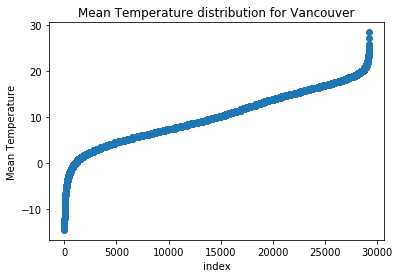

In [31]:
# Plotting distribution 
plt.scatter(range(df.shape[0]), np.sort(df['MEAN_TEMPERATURE_VANCOUVER'].values))
plt.xlabel('index')
plt.ylabel('Mean Temperature')
plt.title("Mean Temperature distribution for Vancouver")
plt.show()

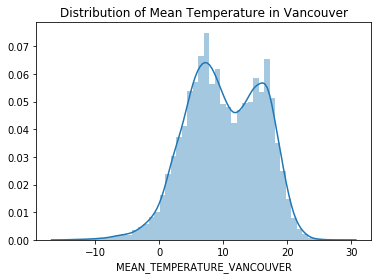

In [22]:
# Visualizing distribution
sns.distplot(df['MEAN_TEMPERATURE_VANCOUVER'])
plt.title("Distribution of Mean Temperature in Vancouver")
plt.show()

In [34]:
# As expected we see tails on both positive and negative for summer and winter months

In [30]:
print("Mean Temperature Skewness: %f" % df['MEAN_TEMPERATURE_VANCOUVER'].skew())
print("Mean Temperature Kurtosis: %f" % df['MEAN_TEMPERATURE_VANCOUVER'].kurt())

Mean Temperature Skewness: -0.200694
Mean Temperature Kurtosis: -0.437725


### EDA - Precipitation in Vancouver

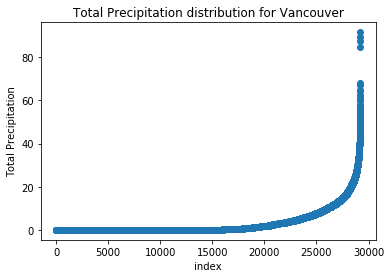

In [32]:
# Plotting distribution 
plt.scatter(range(df.shape[0]), np.sort(df['TOTAL_PRECIPITATION_VANCOUVER'].values))
plt.xlabel('index')
plt.ylabel('Total Precipitation')
plt.title("Total Precipitation distribution for Vancouver")
plt.show()

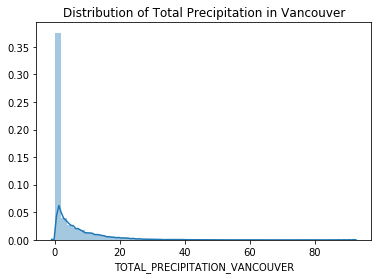

In [26]:
# Visualizing distribution
sns.distplot(df['TOTAL_PRECIPITATION_VANCOUVER'])
plt.title("Distribution of Total Precipitation in Vancouver")
plt.show()

In [36]:
# Sunny days in Vancouver are highly proabable. Its still called raincouver for a reason though

In [29]:
print("Total Precipitation Skewness: %f" % df['TOTAL_PRECIPITATION_VANCOUVER'].skew())
print("Total Precipitation Kurtosis: %f" % df['TOTAL_PRECIPITATION_VANCOUVER'].kurt())

Skewness: 3.416370
Kurtosis: 17.367778


### Univariate Anomaly detection for Mean Temperature